In [2]:
import obspy
from obspy import read
from obspy import UTCDateTime as utc
from obspy.clients.fdsn import Client
client = Client('IRIS')

import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#Make folder for cleaned data
! mkdir data/clean
filepath = os.getcwd() + '/data/clean/'
raw_filepath = os.getcwd() + '/data/raw/'

### Cleaning/Processing Steps
The data will be demeaned similar to Zali et al., using a more conservative downsample rate of 20 Hz, given volcanic tremor is typically between 1-9 Hz.

*Read in mseed files <br>
*Check all are the same length <br>
*Demean and detrend <br>
*Anti-alias filter and downsample data to 20 Hz

In [4]:
#demean, detrend, lowpass filter, and downsample

def process(st, buffer, freq, max_target_frequency): #freq is the original sampling frequency
    tr = st[0].copy()

    #demean and detrend
    tr.detrend('demean')
    tr.detrend('linear')

    #taper data (to specified taper buffer)
    tr.taper(max_percentage=0.05)

    #lowpass filter data to avoid aliasing when downsampling
    tr.filter('lowpass', freq=2*max_target_frequency, zerophase=True)

    #downsample to 20 Hz
    dec_factor = int(freq / (2*max_target_frequency))
    tr.decimate(dec_factor, no_filter=True)

    #trim off tapered edges
    tr.trim(starttime=tr.stats.starttime+buffer, endtime=tr.stats.endtime-buffer)

    return(tr)

Processing Day 1...


/home/jen/anaconda3/envs/mlgeo/lib/python3.11/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


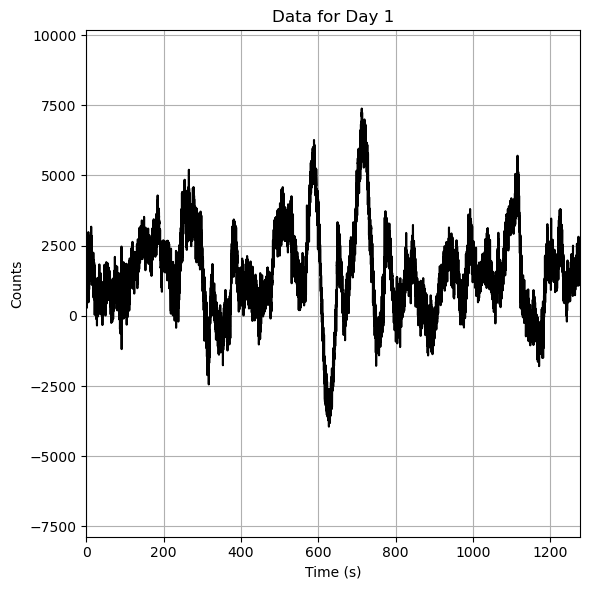

Processing Day 2...


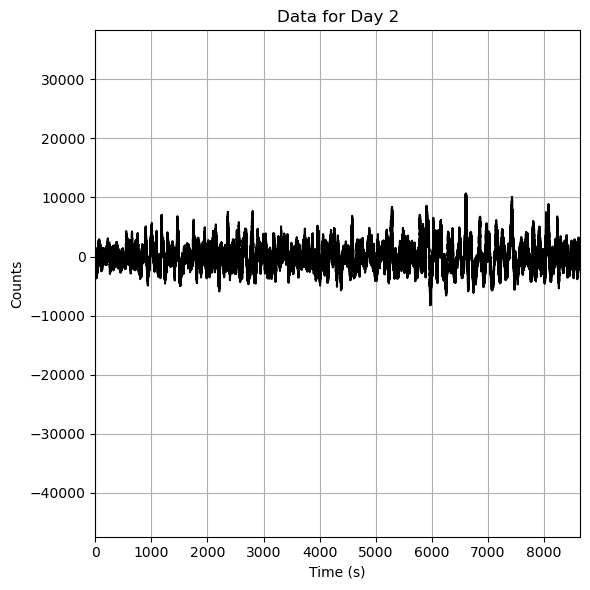

Processing Day 3...


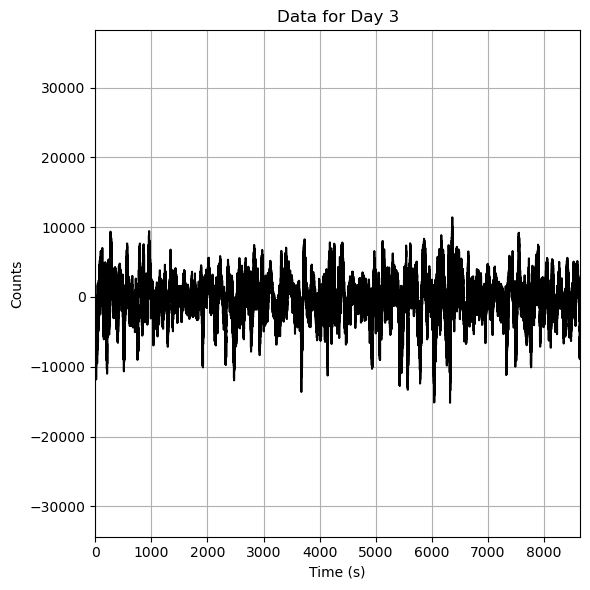

Processing Day 4...


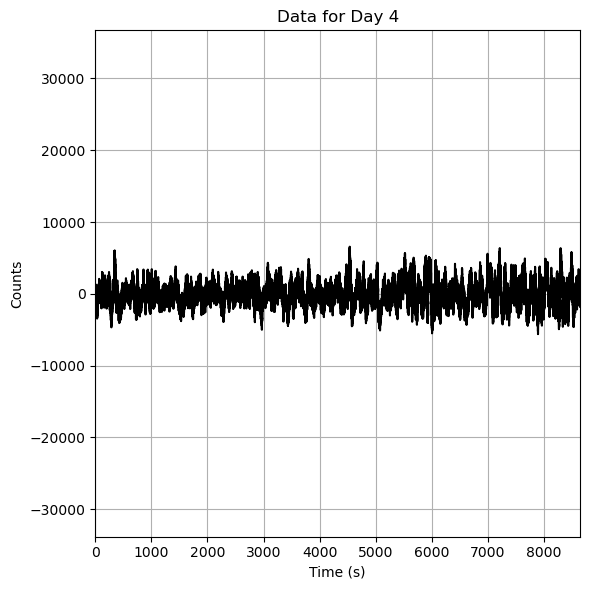

Processing Day 5...


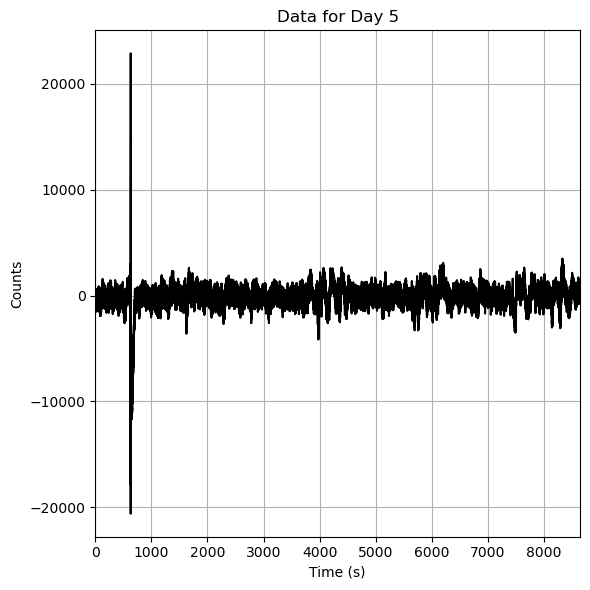

Processing Day 6...


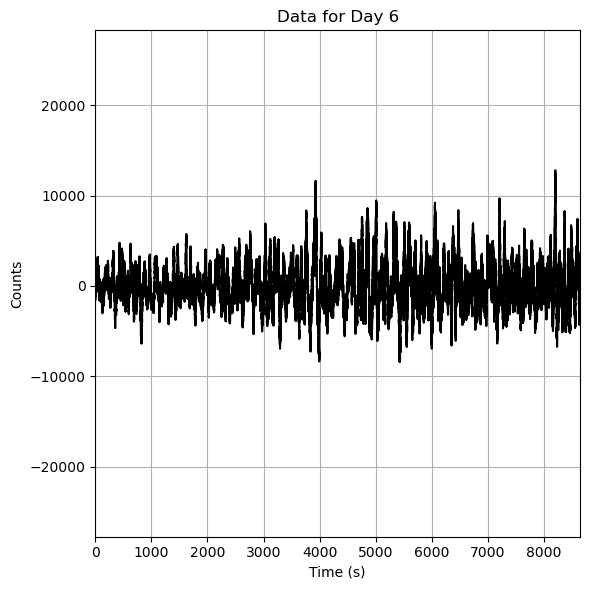

Processing Day 7...


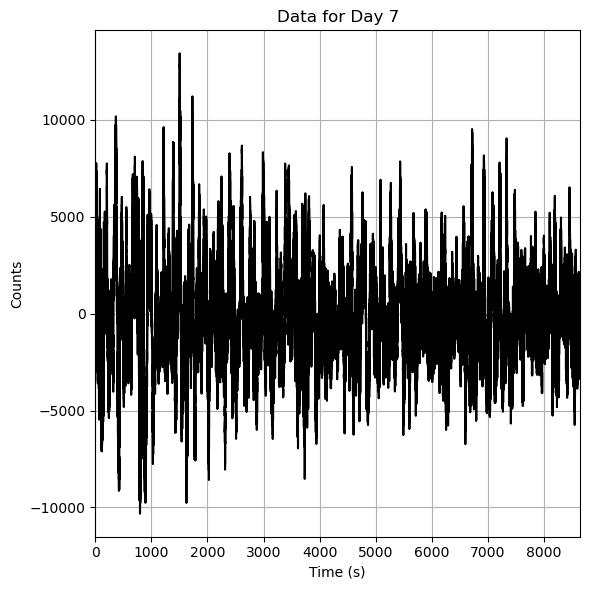

Processing Day 8...


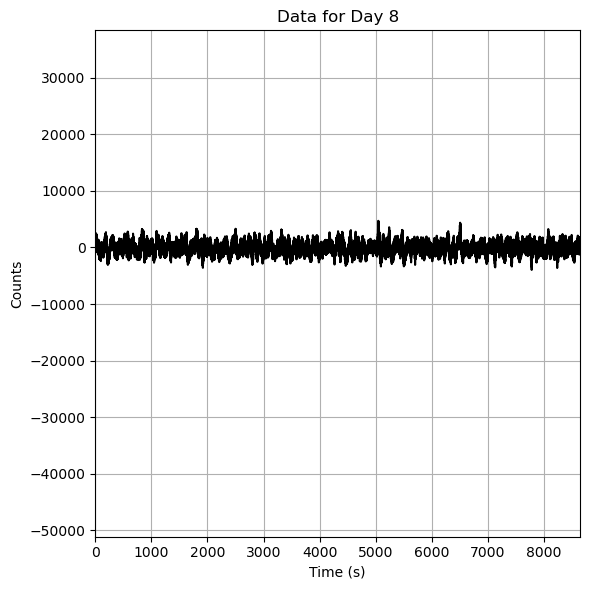

Processing Day 9...


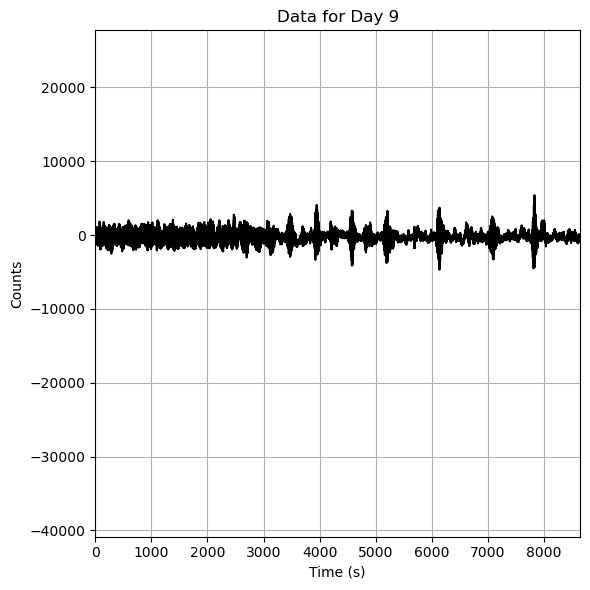

Processing Day 10...


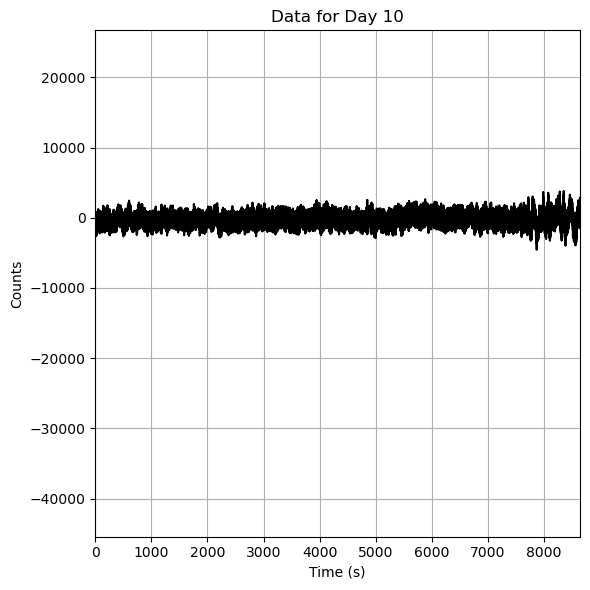

Processing Day 11...


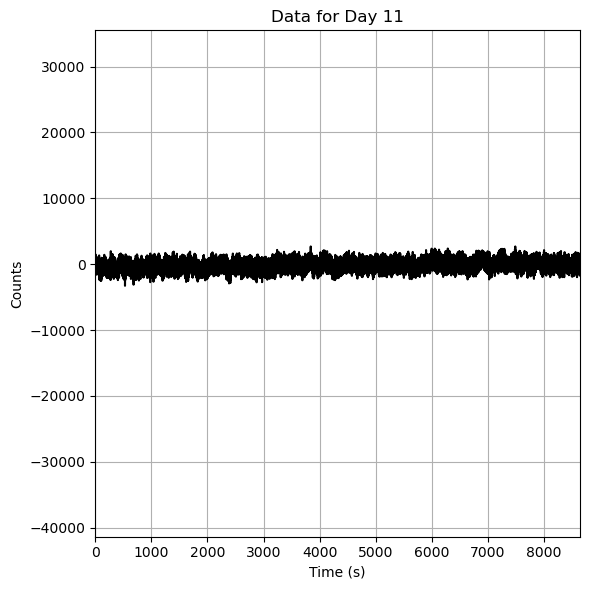

Processing Day 12...


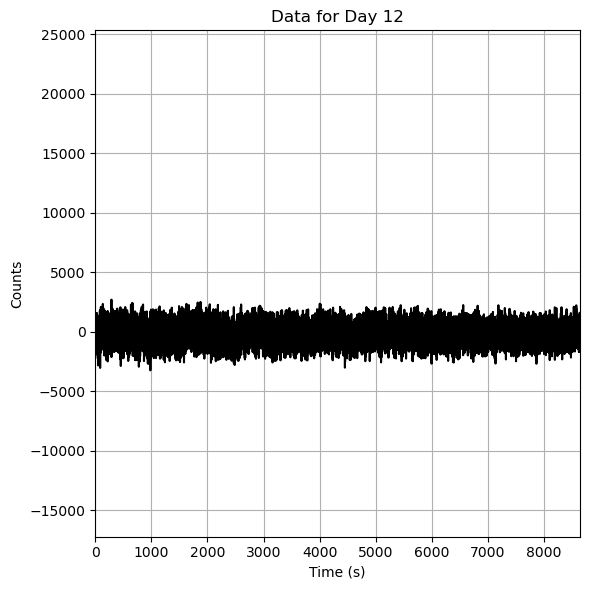

Processing Day 13...


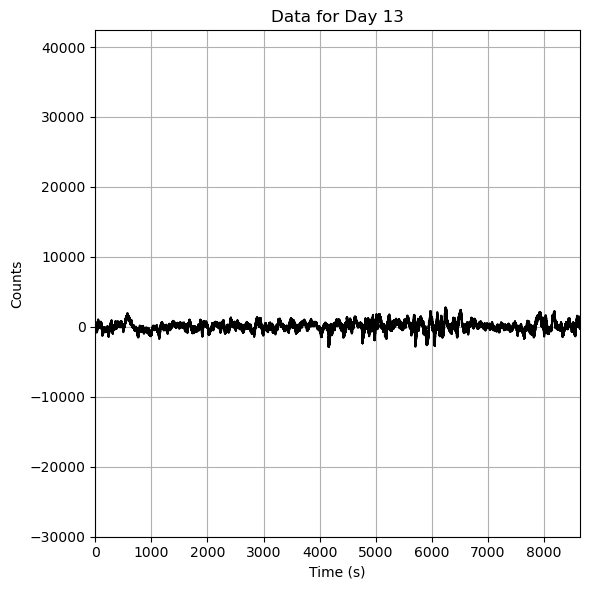

Processing Day 14...


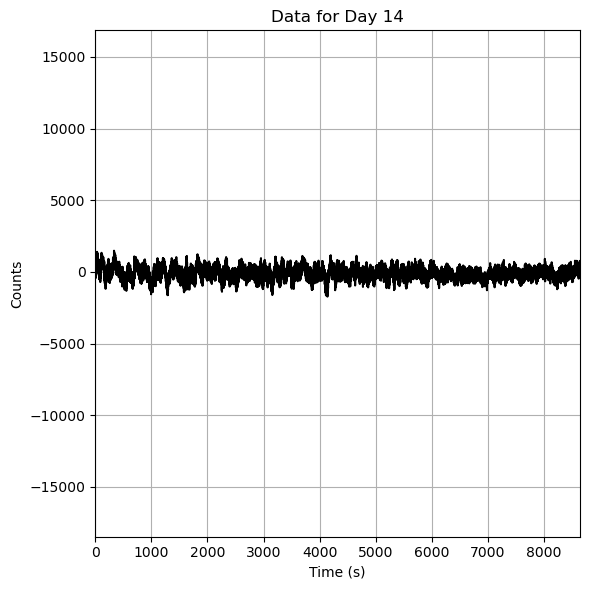

Processing Day 15...


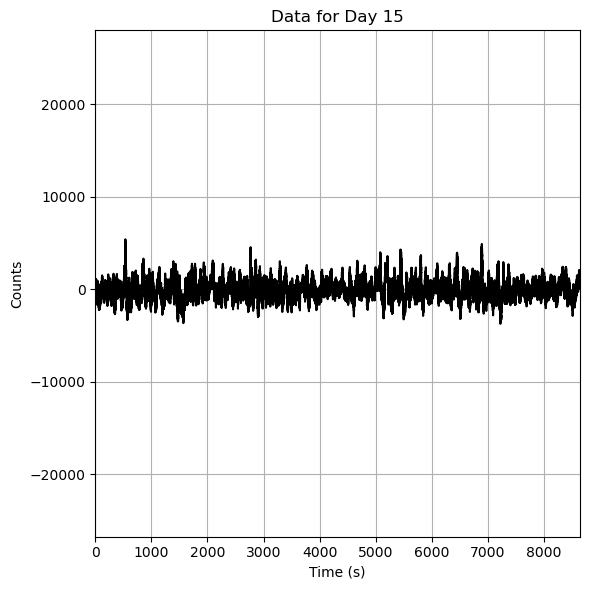

Processing Day 16...


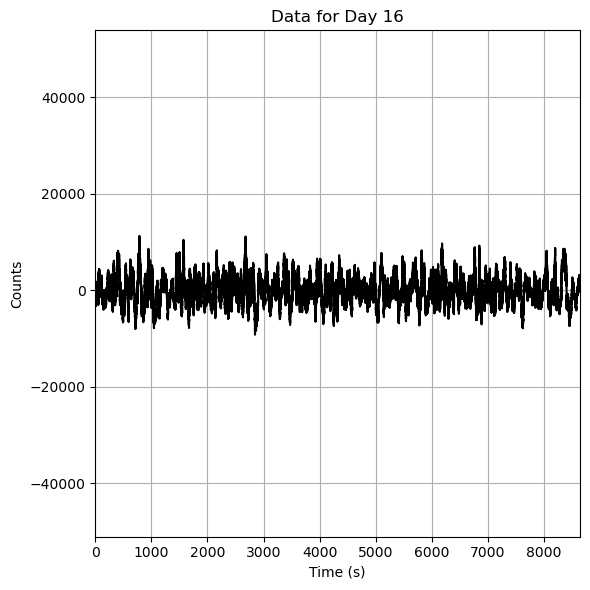

Processing Day 17...


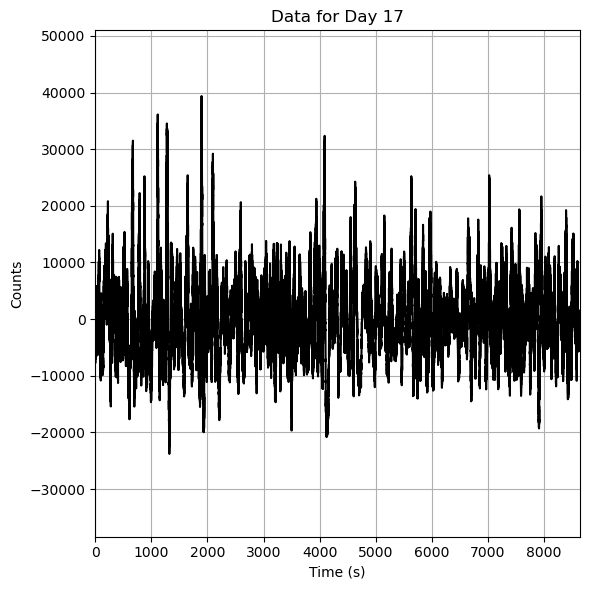

Processing Day 18...


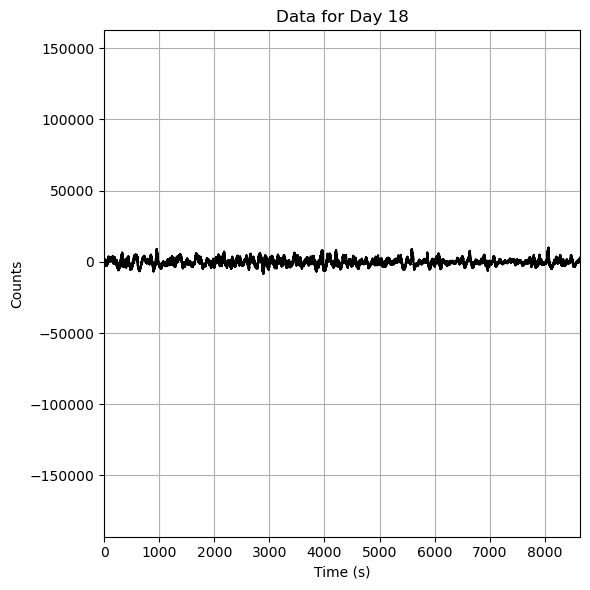

Processing Day 19...


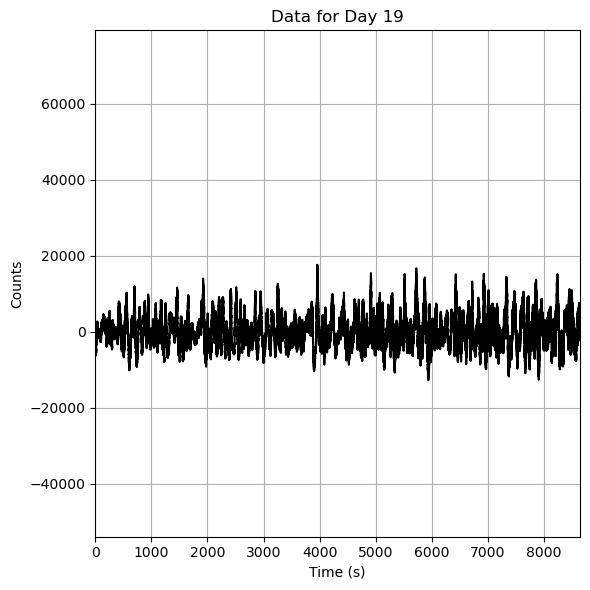

Processing Day 20...


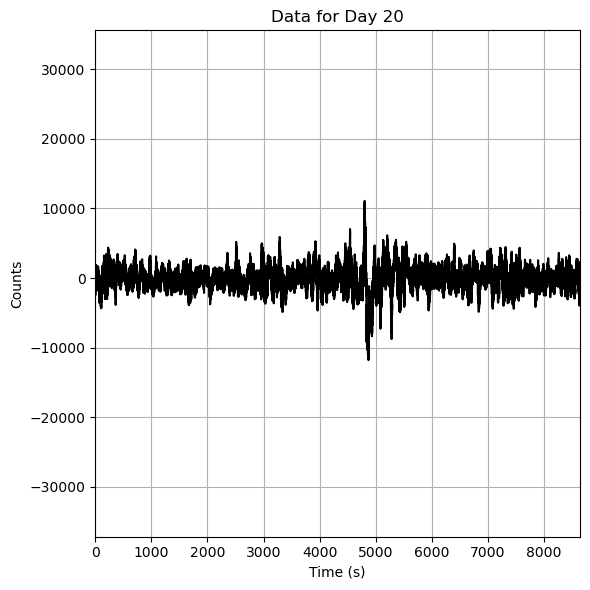

Processing Day 21...


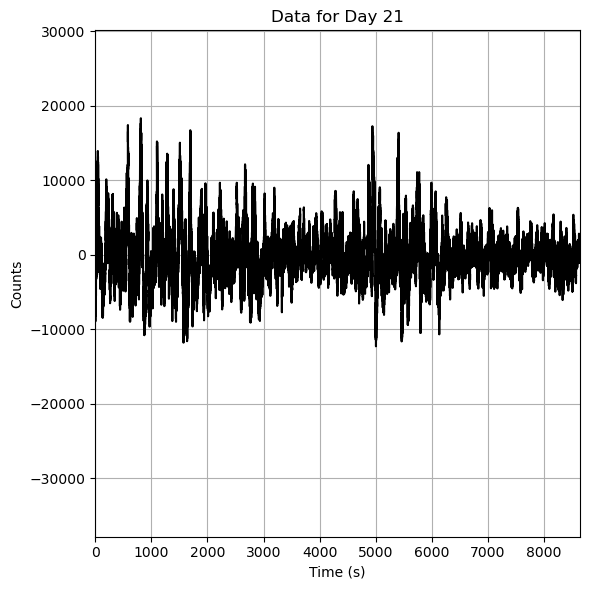

Processing Day 22...


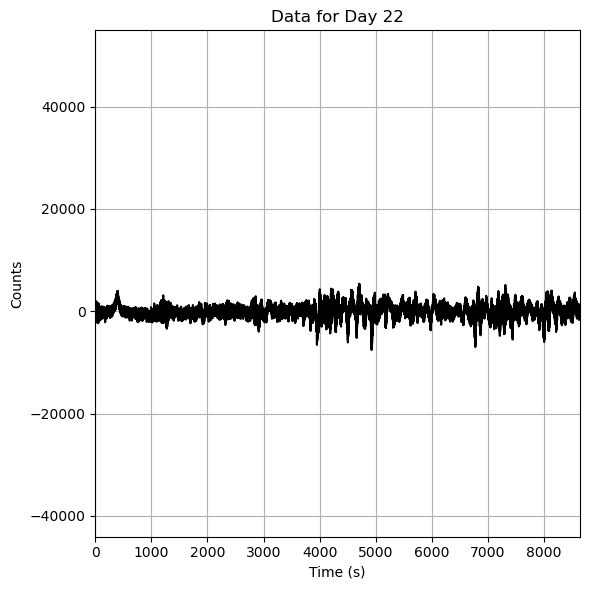

Processing Day 23...


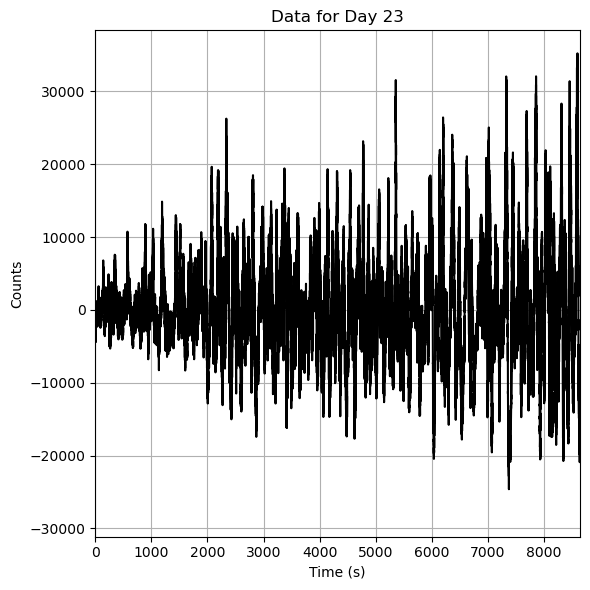

Processing Day 24...


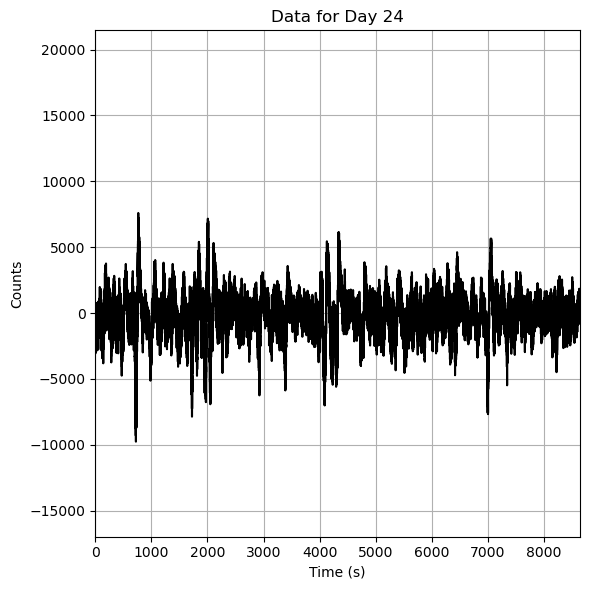

Processing Day 25...


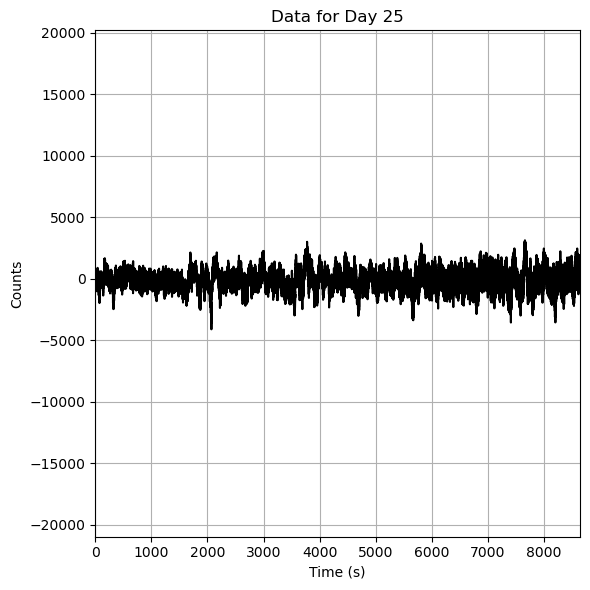

Processing Day 26...


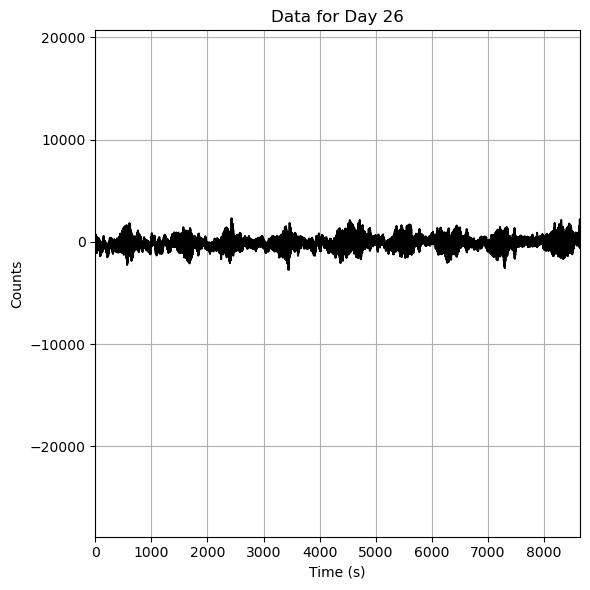

Processing Day 27...


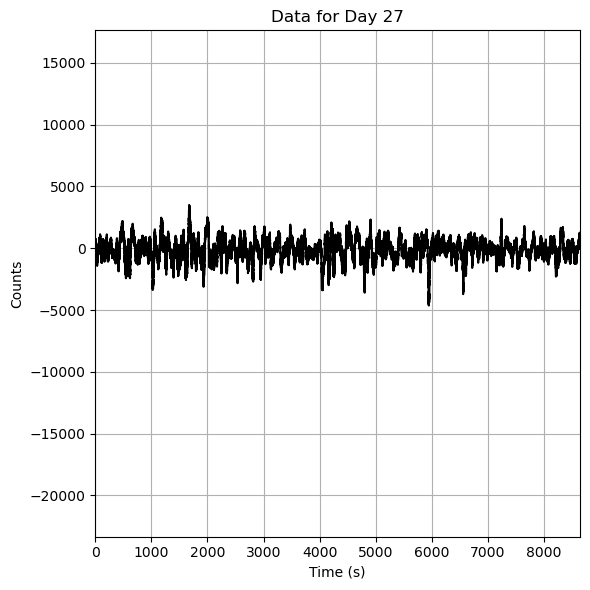

Processing Day 28...


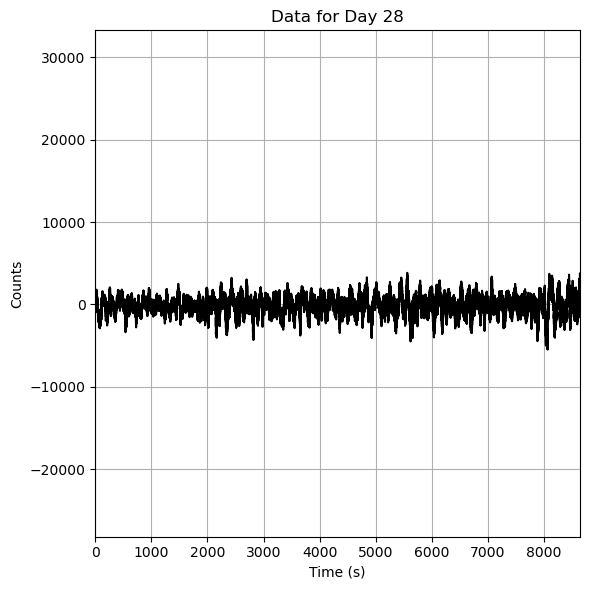

Processing Day 29...


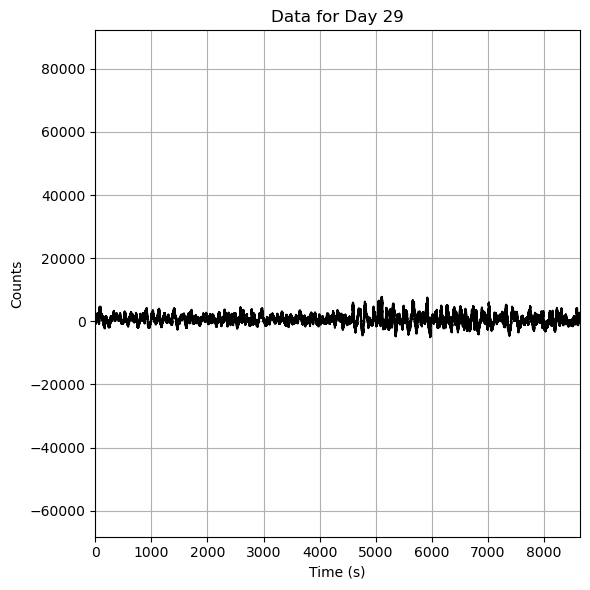

Processing Day 30...


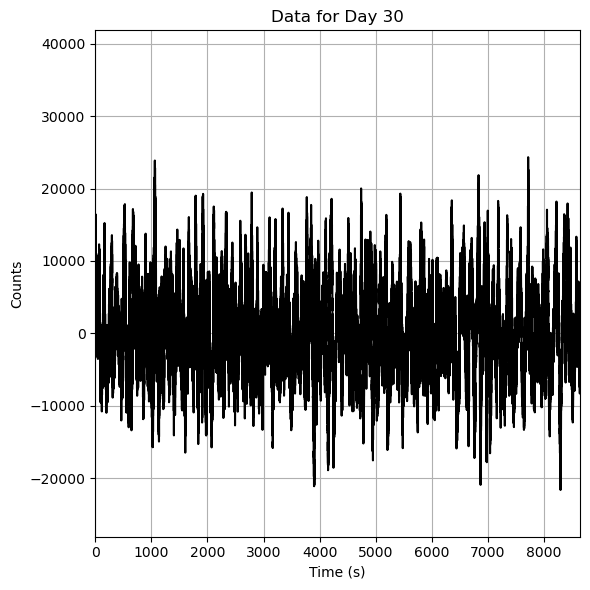

Processing Day 31...


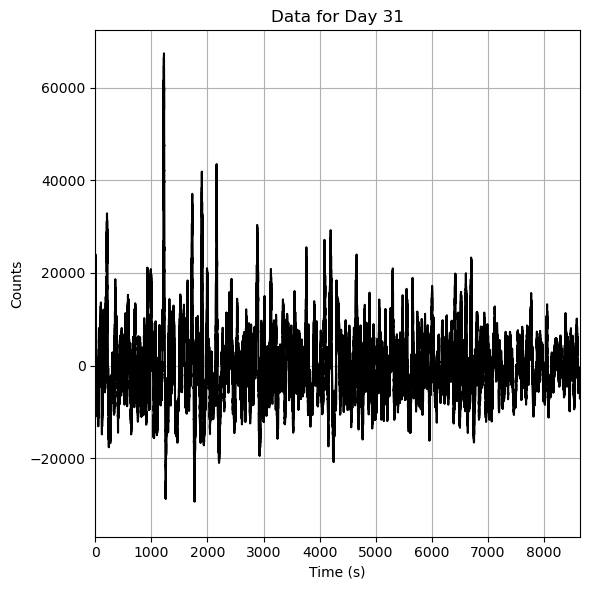

Processing Day 32...


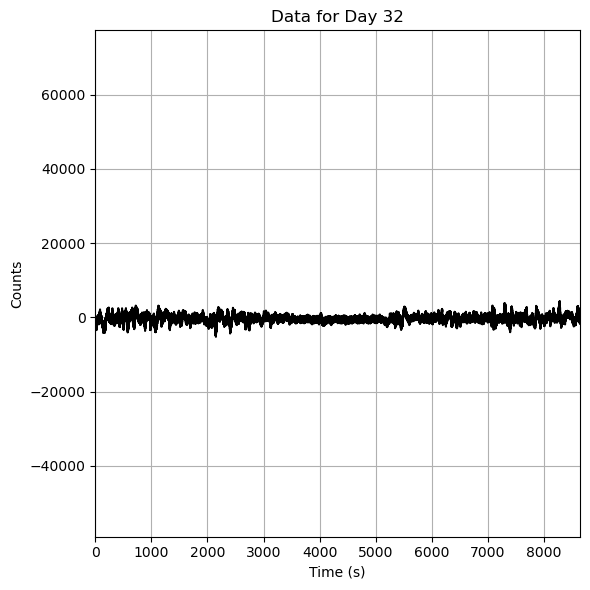

Processing Day 33...


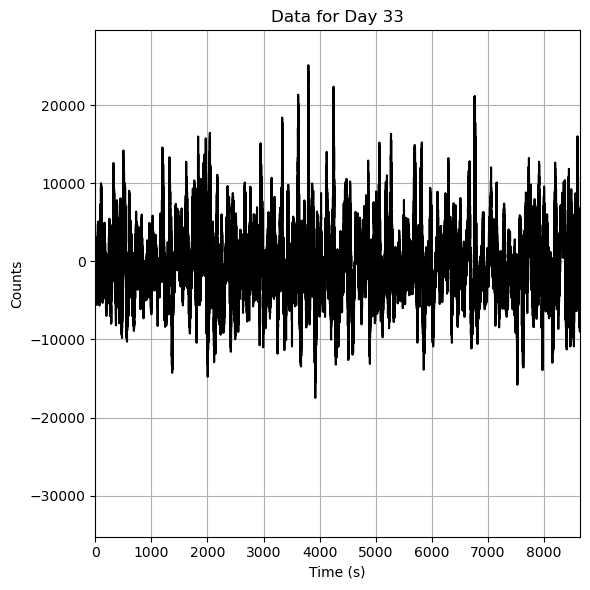

Processing Day 34...


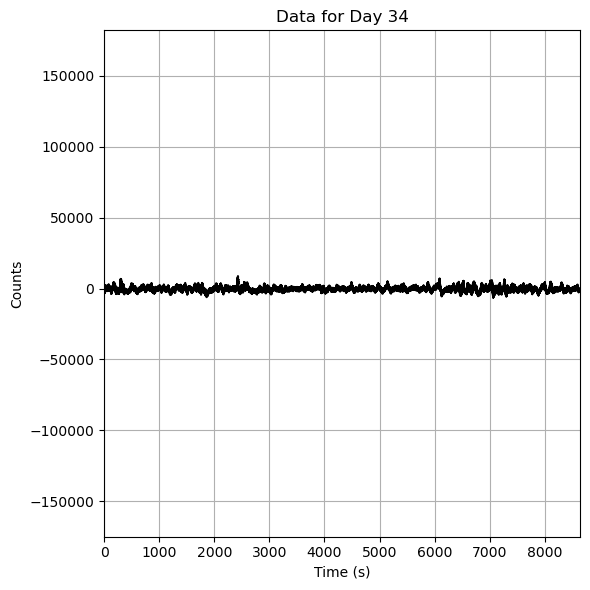

Processing Day 35...


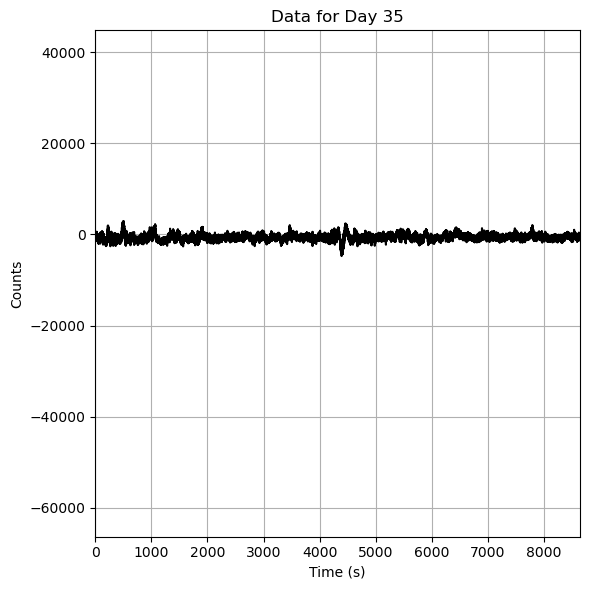

Processing Day 36...


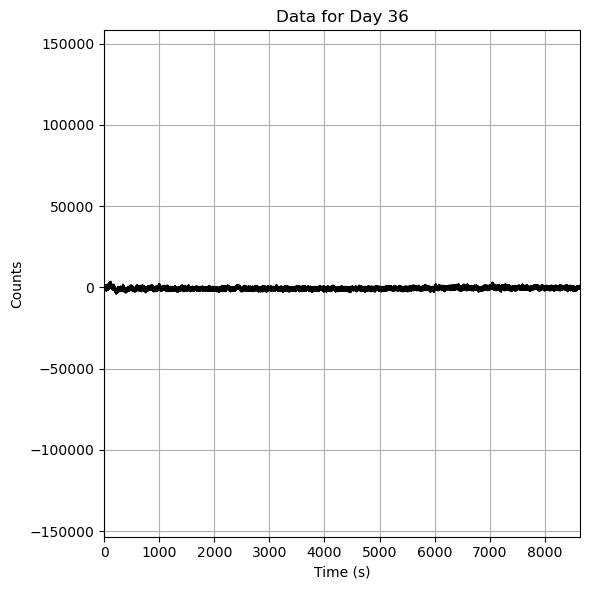

Processing Day 37...


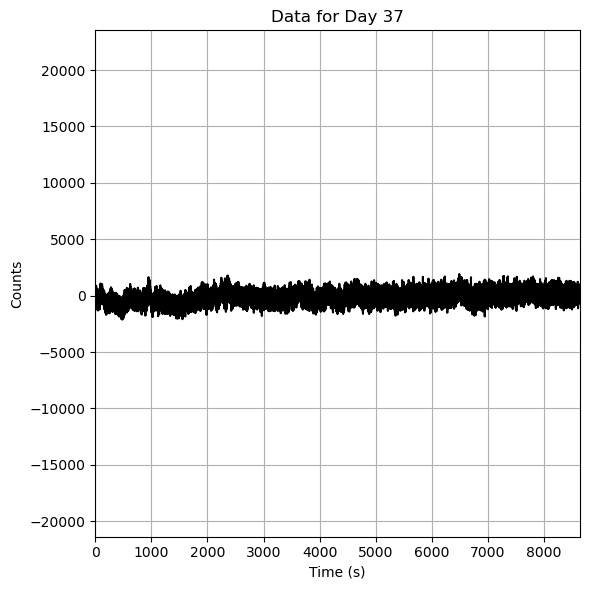

Processing Day 38...


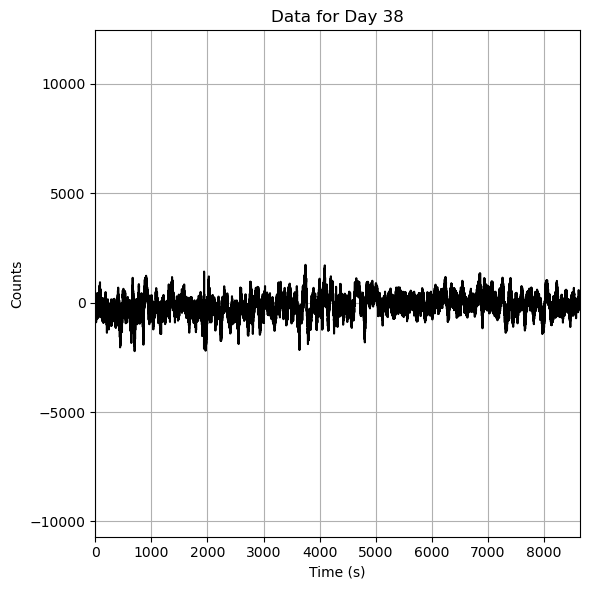

Processing Day 39...


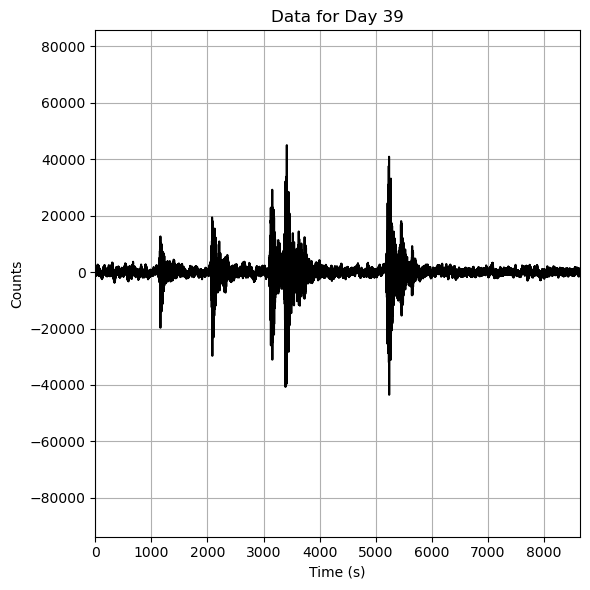

Processing Day 40...


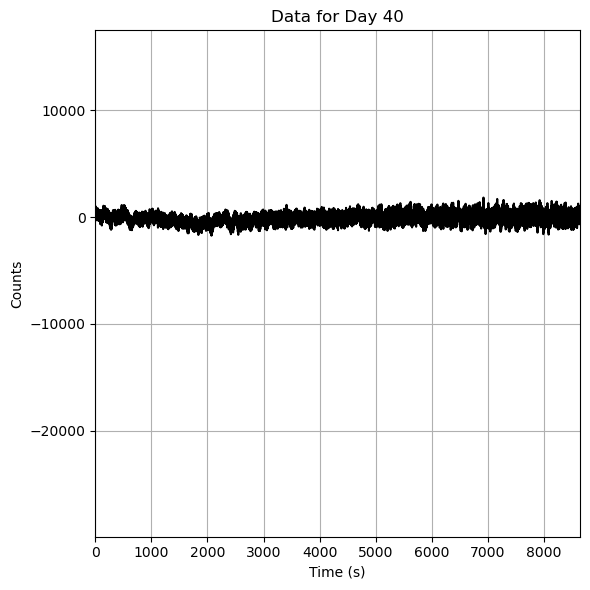

Processing Day 41...


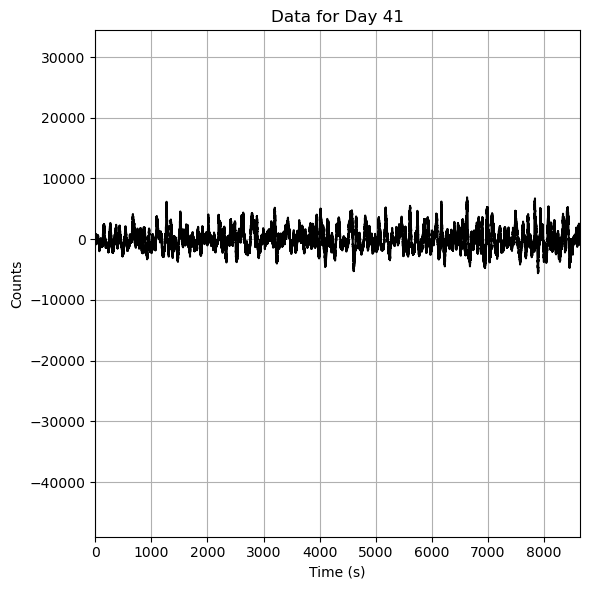

Processing Day 42...


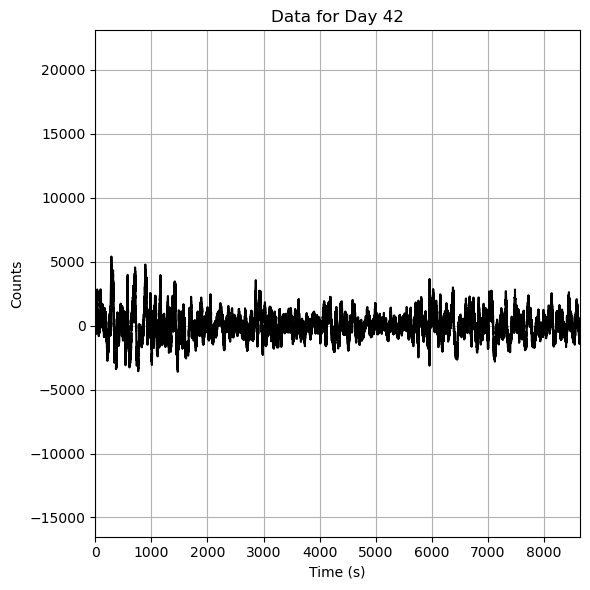

Processing Day 43...


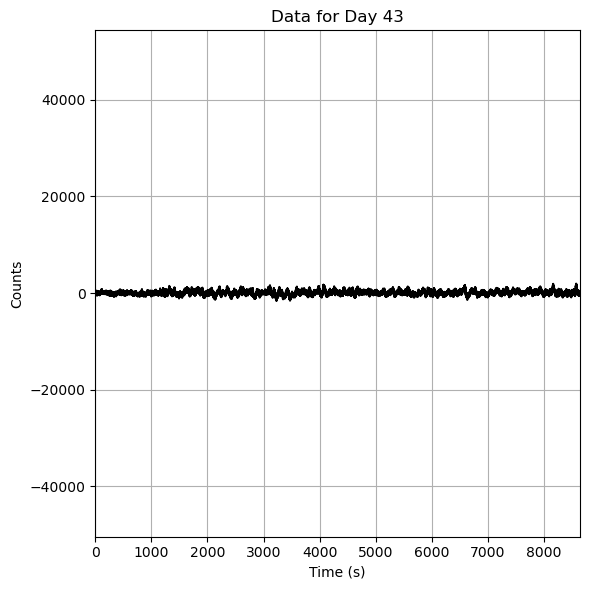

Processing Day 44...


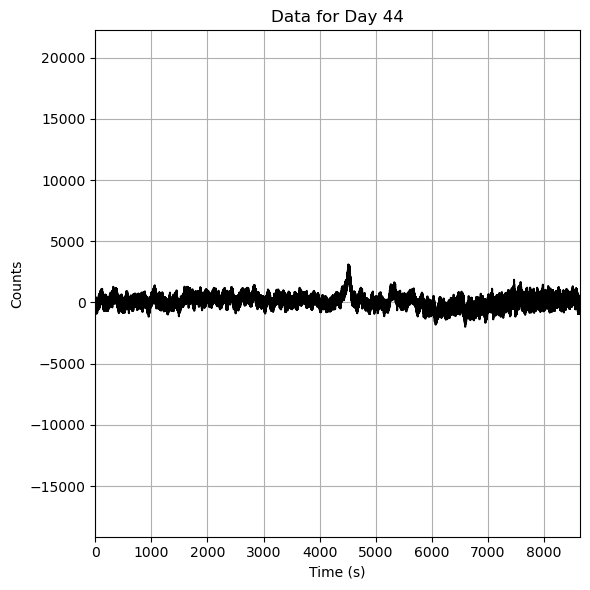

Processing Day 45...


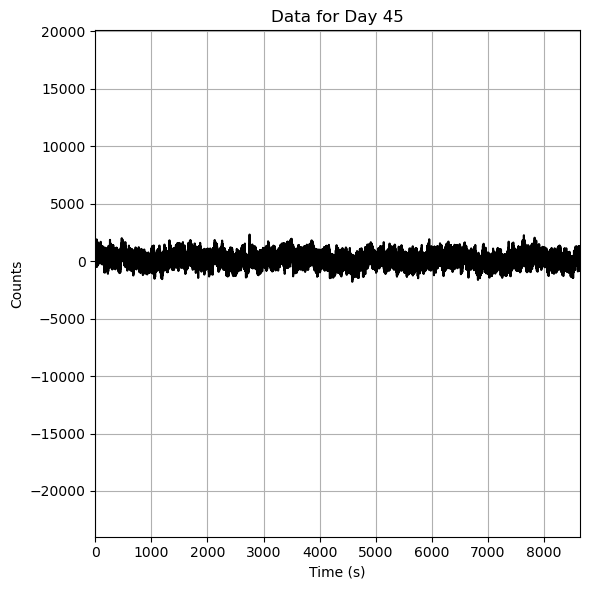

Processing Day 46...


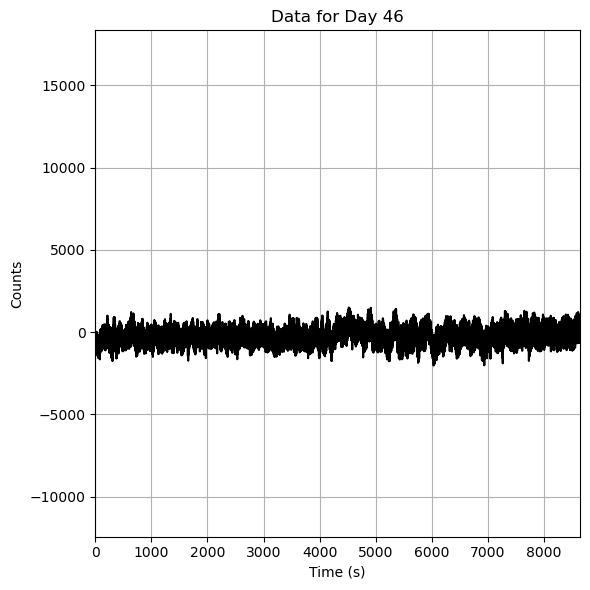

Processing Day 47...


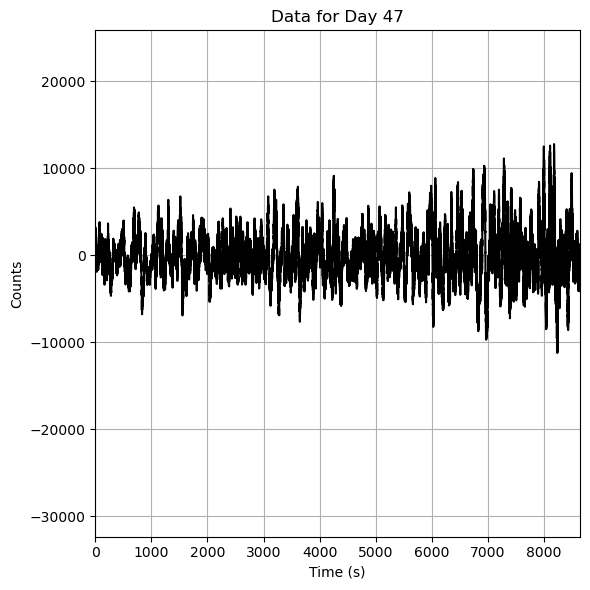

Processing Day 48...


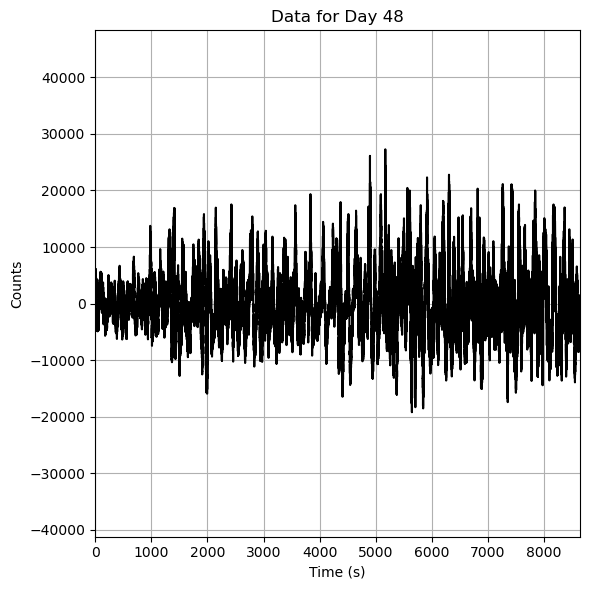

Processing Day 49...


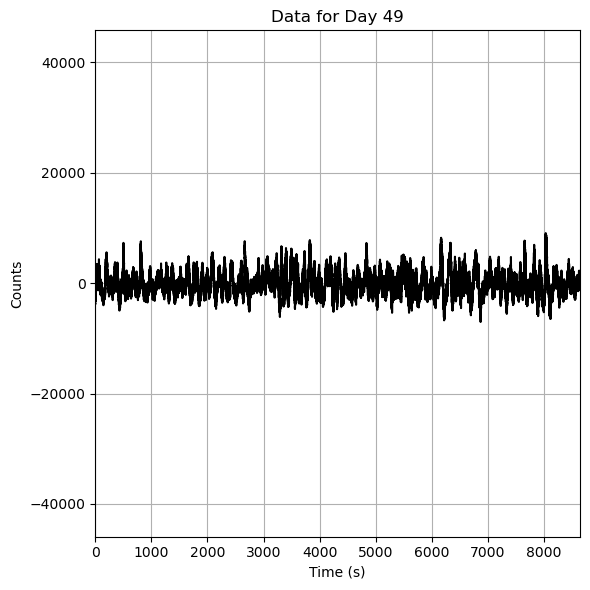

Processing Day 50...


FileNotFoundError: [Errno 2] No such file or directory: '/home/jen/MLGEO2024_Geldingadalir/notebooks/analysis_HOPS/data/raw/50_sitkin.mseed'

In [7]:
#read in data, process, save cleaned data and figures
length = np.array([])

for i in range(100):
    i += 1
    print(f'Processing Day {i}...')
    mseed_name = str(i)+'_sitkin.mseed'
    st = read(raw_filepath+mseed_name)

    #parameters for processing function
    buffer = 60*60*24*0.05 #seconds
    freq = st[0].stats.sampling_rate
    max_target_freq = 10

    #do processing
    tr = process(st, buffer, freq, max_target_freq)

    #save trace to mseed again
    tr.write(filepath+str(i)+'_cleaned.mseed', format='MSEED')

    #add data length to array
    length = np.append(length, len(tr.data))

    #plot and save figures
    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    ax.plot(tr.times('relative'), tr.data, c='k')
    ax.set_title('Data for Day '+mseed_name.split('_')[0])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts')
    ax.set_xlim(0, len(tr.data)/freq)
    ax.grid()
    plt.tight_layout()
    plt.savefig(filepath+'Day'+mseed_name.split('_')[0]+'.png')
    plt.show()
    plt.close();

Save simple time series plots to visually inspect for outliers/data issues not a simple way to remove outliers algorithmically, day 87 for example has extremely impulsive events that look like malfunctions, but are real

In [8]:
#check that all values in length are equal
np.unique(length)

array([ 255363., 1728001.])

This is the correct number of points (+1) for 24 hours of data sampled at 25 Hz. The single extra point is a product of the decimation, will be removed in the preparing ai ready data notebook.